<a href="https://colab.research.google.com/github/isaramadunika/Advanced_Statistics_Project/blob/main/Advanced_Statistics_for_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data cleaning

In [18]:
# Load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/ASDS/Dialog_2009_2023_Daily.csv')

# Display the first few rows to understand the data
print("First 5 rows of the dataset:")
print(df.head())

# Check data types and missing values
print("\
Data types and missing values:")
print(df.info())

# Basic statistics
print("\
Basic statistics:")
print(df.describe())

# Check if we need to convert any columns
# Convert Date to datetime if it's not already
if 'Date' in df.columns and not pd.api.types.is_datetime64_any_dtype(df['Date']):
    df['Date'] = pd.to_datetime(df['Date'])
    print("\
Date column converted to datetime")

# Check if Volume column needs cleaning (it might have 'K' or 'M' suffixes)
if 'Vol.' in df.columns:
    # Rename to 'Volume' for clarity
    df = df.rename(columns={'Vol.': 'Volume'})

    # Convert Volume to numeric if it's not already
    if not pd.api.types.is_numeric_dtype(df['Volume']):
        # Function to convert volume strings to numeric
        def convert_volume(vol_str):
            if isinstance(vol_str, str):
                if 'K' in vol_str:
                    return float(vol_str.replace('K', '')) * 1000
                elif 'M' in vol_str:
                    return float(vol_str.replace('M', '')) * 1000000
                else:
                    return float(vol_str)
            return vol_str

        df['Volume'] = df['Volume'].apply(convert_volume)
        print("\
Volume column cleaned and converted to numeric")

# Convert Change % to numeric if needed
if 'Change %' in df.columns:
    # Rename to 'Change_pct' for easier handling
    df = df.rename(columns={'Change %': 'Change_pct'})

    # Convert to numeric if it's not already
    if not pd.api.types.is_numeric_dtype(df['Change_pct']):
        df['Change_pct'] = df['Change_pct'].str.replace('%', '').astype(float) / 100
        print("\
Change_pct column cleaned and converted to numeric")

print("\
Updated dataset head:")
print(df.head())

First 5 rows of the dataset:
        Date  Price  Open  High   Low     Vol. Change %
0   7/8/2009   5.25  5.25  5.25  5.00  714.20K    0.00%
1   7/9/2009   5.25  5.25  5.25  5.00  386.70K    0.00%
2  7/13/2009   5.25  5.25  5.25  5.00  290.90K    0.00%
3  7/14/2009   5.25  5.25  5.25  5.25  163.60K    0.00%
4  7/15/2009   5.25  5.25  5.25  5.00   63.10K    0.00%
Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3268 non-null   object 
 1   Price     3268 non-null   float64
 2   Open      3268 non-null   float64
 3   High      3268 non-null   float64
 4   Low       3268 non-null   float64
 5   Vol.      3268 non-null   object 
 6   Change %  3268 non-null   object 
dtypes: float64(4), object(3)
memory usage: 178.8+ KB
None
Basic statistics:
             Price         Open         High          Low
count  3268.

## Hypothisis testing and Visulaisation

Dataset Description:
Source: /content/drive/MyDrive/ASDS/Dialog_2009_2023_Daily.csv
Variables: Date, Price, Open, High, Low, Volume, Change_pct
Size: 3268 rows and 7 columns
Time period: 2009-07-08 to 2023-04-12
--- Hypothesis Test 1: One-Sample t-test ---
Null Hypothesis (H0): The mean Price is equal to $10
Alternative Hypothesis (Ha): The mean Price is not equal to $10
Test Statistic: 7.8885
P-value: 0.0000
95% Confidence Interval for the mean: (10.2097, 10.3484)
Conclusion: Reject the null hypothesis (H0). The mean Price is significantly different from $10
--- Hypothesis Test 2: Paired t-test ---
Null Hypothesis (H0): There is no difference between Open and Close (Price) prices
Alternative Hypothesis (Ha): There is a significant difference between Open and Close prices
Test Statistic: 5.1414
P-value: 0.0000
Mean difference (Open - Close): 0.0165
95% Confidence Interval for the mean difference: (0.0102, 0.0228)
Conclusion: Reject the null hypothesis (H0). There is a significant diffe

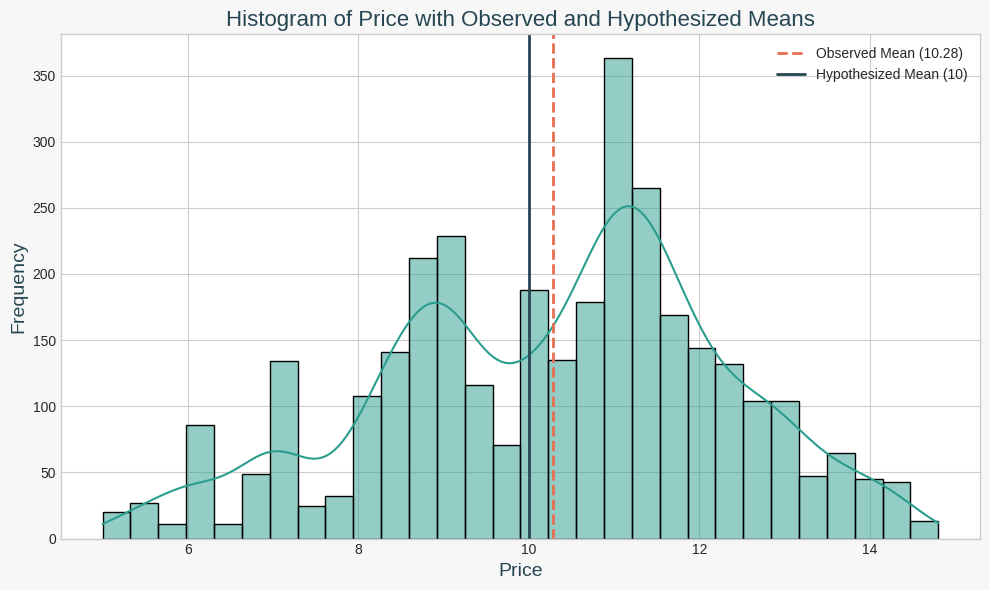

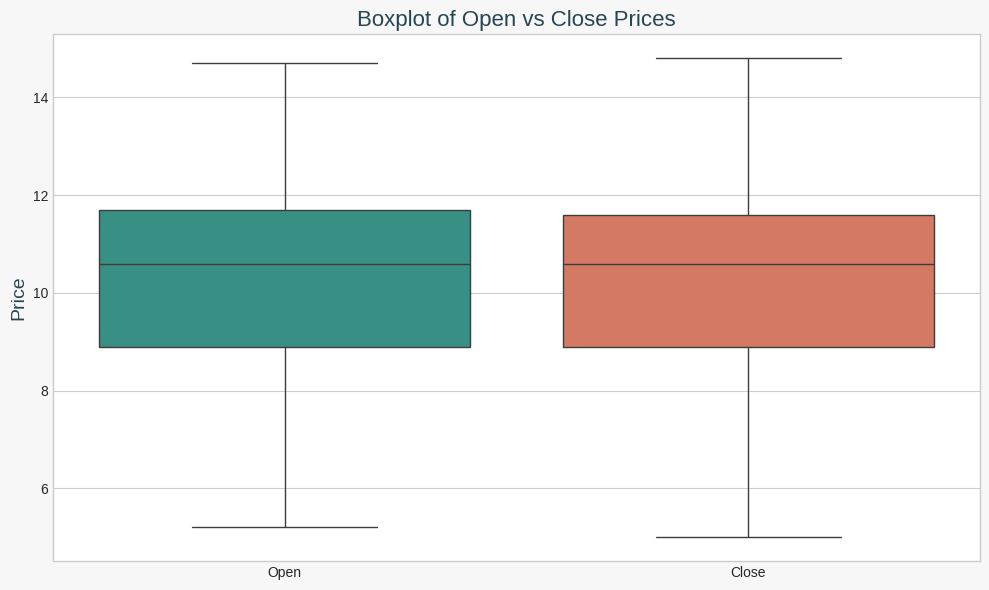

<ipython-input-20-b85da34088d3>:147: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Period', y='Price', data=boxplot_data_mw, palette=[colors['line'], colors['highlight']])


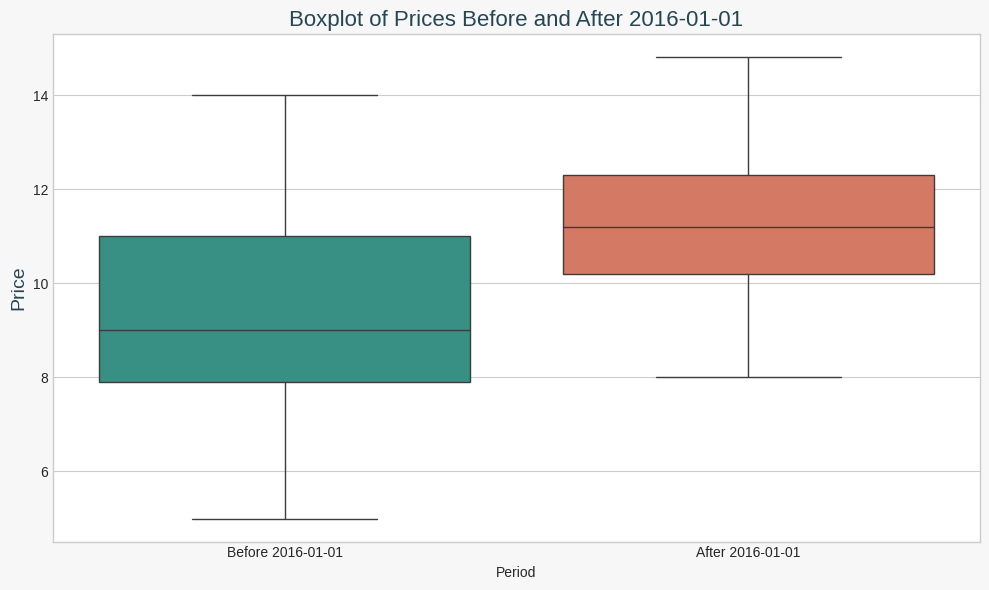

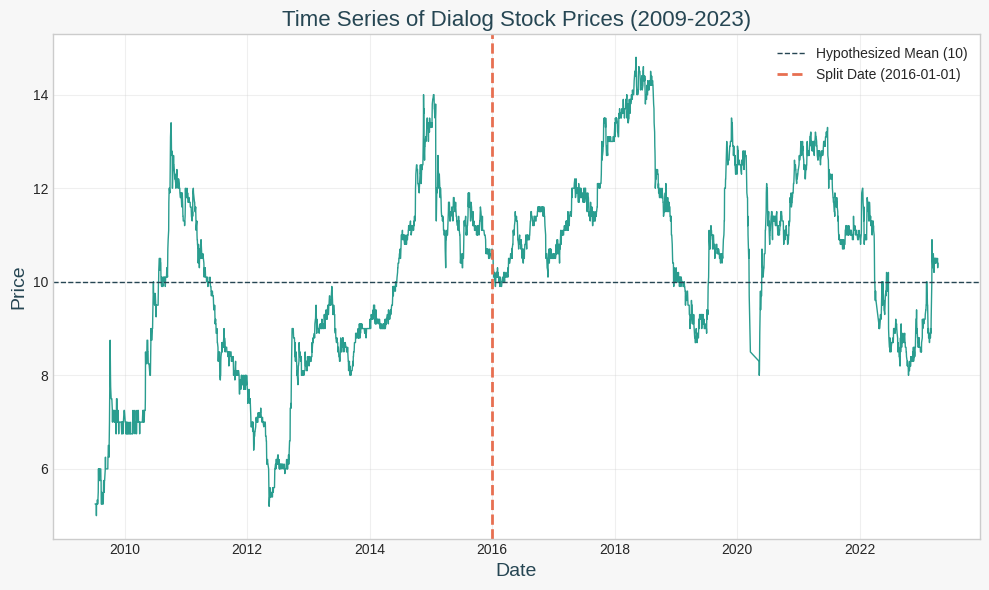

<ipython-input-20-b85da34088d3>:168: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Period', y='Price', data=boxplot_data_mw, palette=[colors['line'], colors['highlight']])


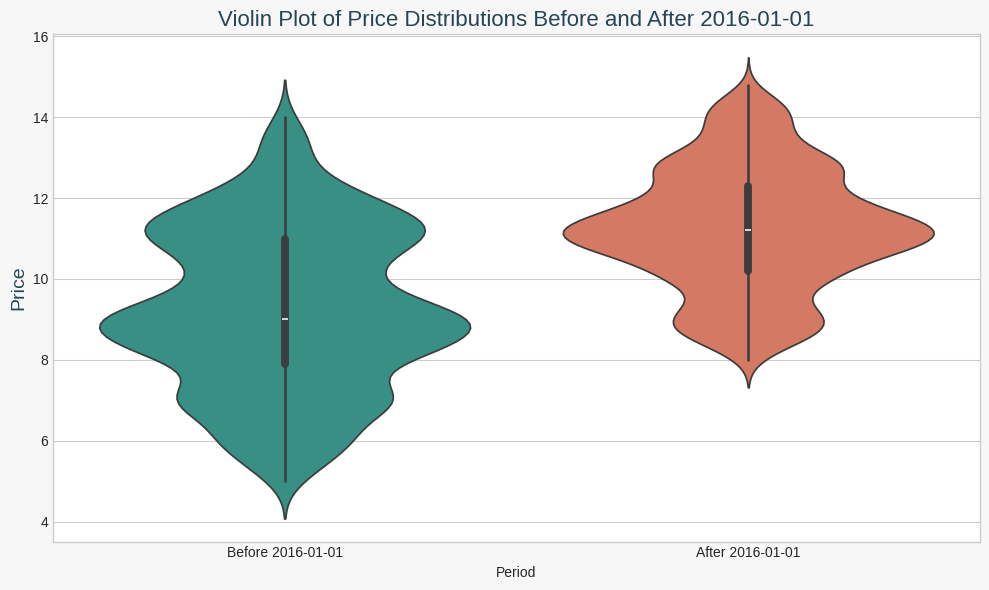

Hypothesis testing and visualization complete.


In [20]:
# Now that we have the data properly loaded and cleaned, let's perform hypothesis testing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set a matched color palette using Gestalt principles for visual consistency
colors = {'background': '#f7f7f7', 'line': '#2a9d8f', 'highlight': '#e76f51', 'text': '#264653'}

# Dataset description
print('Dataset Description:')
print('Source: /content/drive/MyDrive/ASDS/Dialog_2009_2023_Daily.csv')
print('Variables: Date, Price, Open, High, Low, Volume, Change_pct')
print('Size: ' + str(df.shape[0]) + ' rows and ' + str(df.shape[1]) + ' columns')
print('Time period: ' + str(df['Date'].min().date()) + ' to ' + str(df['Date'].max().date()))

# ---- Hypothesis Testing Methodology ----
# We will perform multiple hypothesis tests:
# 1. One-sample t-test: Is the mean price different from $10?
# 2. Paired t-test: Is there a difference between Open and Close prices?
# 3. Mann-Whitney U test: Compare prices before and after a specific date

print('\
--- Hypothesis Test 1: One-Sample t-test ---')
print('Null Hypothesis (H0): The mean Price is equal to $10')
print('Alternative Hypothesis (Ha): The mean Price is not equal to $10')

mu0 = 10
prices = df['Price'].dropna()

# Perform a one-sample t-test
t_stat, p_value = stats.ttest_1samp(prices, mu0)

# Calculate the 95% confidence interval for the mean
n = len(prices)
mean_price = np.mean(prices)
std_err = stats.sem(prices)
confidence_interval = stats.t.interval(0.95, n-1, loc=mean_price, scale=std_err)

# Output test results
print('\
Test Statistic: {:.4f}'.format(t_stat))
print('P-value: {:.4f}'.format(p_value))
print('95% Confidence Interval for the mean: ({:.4f}, {:.4f})'.format(confidence_interval[0], confidence_interval[1]))

if p_value < 0.05:
    print('\
Conclusion: Reject the null hypothesis (H0). The mean Price is significantly different from $' + str(mu0))
else:
    print('\
Conclusion: Fail to reject the null hypothesis (H0). There is not enough evidence that the mean Price is different from $' + str(mu0))

# ---- Hypothesis Test 2: Paired t-test ----
print('\
\
--- Hypothesis Test 2: Paired t-test ---')
print('Null Hypothesis (H0): There is no difference between Open and Close (Price) prices')
print('Alternative Hypothesis (Ha): There is a significant difference between Open and Close prices')

# Perform a paired t-test
t_stat_paired, p_value_paired = stats.ttest_rel(df['Open'], df['Price'])

# Calculate the mean difference and its 95% confidence interval
diff = df['Open'] - df['Price']
mean_diff = np.mean(diff)
std_err_diff = stats.sem(diff)
confidence_interval_diff = stats.t.interval(0.95, len(diff)-1, loc=mean_diff, scale=std_err_diff)

# Output test results
print('\
Test Statistic: {:.4f}'.format(t_stat_paired))
print('P-value: {:.4f}'.format(p_value_paired))
print('Mean difference (Open - Close): {:.4f}'.format(mean_diff))
print('95% Confidence Interval for the mean difference: ({:.4f}, {:.4f})'.format(confidence_interval_diff[0], confidence_interval_diff[1]))

if p_value_paired < 0.05:
    print('\
Conclusion: Reject the null hypothesis (H0). There is a significant difference between Open and Close prices')
else:
    print('\
Conclusion: Fail to reject the null hypothesis (H0). There is not enough evidence of a difference between Open and Close prices')

# ---- Hypothesis Test 3: Mann-Whitney U test ----
# Split the data into two periods (before and after 2016)
split_date = pd.Timestamp('2016-01-01')
prices_before = df[df['Date'] < split_date]['Price']
prices_after = df[df['Date'] >= split_date]['Price']

print('\
\
--- Hypothesis Test 3: Mann-Whitney U test ---')
print('Null Hypothesis (H0): The distribution of prices before and after ' + str(split_date.date()) + ' is the same')
print('Alternative Hypothesis (Ha): The distribution of prices before and after ' + str(split_date.date()) + ' is different')

# Perform Mann-Whitney U test
u_stat, p_value_mw = stats.mannwhitneyu(prices_before, prices_after, alternative='two-sided')

# Output test results
print('\
Test Statistic (U): {:.4f}'.format(u_stat))
print('P-value: {:.4f}'.format(p_value_mw))
print('Median price before ' + str(split_date.date()) + ': {:.4f}'.format(prices_before.median()))
print('Median price after ' + str(split_date.date()) + ': {:.4f}'.format(prices_after.median()))

if p_value_mw < 0.05:
    print('\
Conclusion: Reject the null hypothesis (H0). There is a significant difference in price distributions before and after ' + str(split_date.date()))
else:
    print('\
Conclusion: Fail to reject the null hypothesis (H0). There is not enough evidence of a difference in price distributions')

# ---- Graphical Analysis using Gestalt principles ----
# 1. Histogram for One-Sample t-test
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10,6), facecolor=colors['background'])

# Histogram
sns.histplot(prices, bins=30, color=colors['line'], kde=True)

# Add vertical lines for the observed mean and the hypothesized mean
plt.axvline(mean_price, color=colors['highlight'], linestyle='--', linewidth=2, label='Observed Mean ({:.2f})'.format(mean_price))
plt.axvline(mu0, color=colors['text'], linestyle='-', linewidth=2, label='Hypothesized Mean ({})'.format(mu0))

plt.title('Histogram of Price with Observed and Hypothesized Means', fontsize=16, color=colors['text'])
plt.xlabel('Price', fontsize=14, color=colors['text'])
plt.ylabel('Frequency', fontsize=14, color=colors['text'])
plt.legend()
plt.tight_layout()
plt.show()

# 2. Boxplot for Paired t-test
plt.figure(figsize=(10,6), facecolor=colors['background'])
boxplot_data = pd.DataFrame({'Open': df['Open'], 'Close': df['Price']})
sns.boxplot(data=boxplot_data, palette=[colors['line'], colors['highlight']])
plt.title('Boxplot of Open vs Close Prices', fontsize=16, color=colors['text'])
plt.ylabel('Price', fontsize=14, color=colors['text'])
plt.tight_layout()
plt.show()

# 3. Boxplot for Mann-Whitney U test
plt.figure(figsize=(10,6), facecolor=colors['background'])
boxplot_data_mw = pd.DataFrame({
    'Period': ['Before ' + str(split_date.date())] * len(prices_before) + ['After ' + str(split_date.date())] * len(prices_after),
    'Price': pd.concat([prices_before, prices_after])
})
sns.boxplot(x='Period', y='Price', data=boxplot_data_mw, palette=[colors['line'], colors['highlight']])
plt.title('Boxplot of Prices Before and After ' + str(split_date.date()), fontsize=16, color=colors['text'])
plt.ylabel('Price', fontsize=14, color=colors['text'])
plt.tight_layout()
plt.show()

# 4. Time series plot of prices
plt.figure(figsize=(10,6), facecolor=colors['background'])
plt.plot(df['Date'], df['Price'], color=colors['line'], linewidth=1)
plt.axhline(mu0, color=colors['text'], linestyle='--', linewidth=1, label='Hypothesized Mean ({})'.format(mu0))
plt.axvline(split_date, color=colors['highlight'], linestyle='--', linewidth=2, label='Split Date ({})'.format(split_date.date()))
plt.title('Time Series of Dialog Stock Prices (2009-2023)', fontsize=16, color=colors['text'])
plt.xlabel('Date', fontsize=14, color=colors['text'])
plt.ylabel('Price', fontsize=14, color=colors['text'])
plt.legend()
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

# 5. Violin plot for comparing distributions
plt.figure(figsize=(10,6), facecolor=colors['background'])
sns.violinplot(x='Period', y='Price', data=boxplot_data_mw, palette=[colors['line'], colors['highlight']])
plt.title('Violin Plot of Price Distributions Before and After ' + str(split_date.date()), fontsize=16, color=colors['text'])
plt.ylabel('Price', fontsize=14, color=colors['text'])
plt.tight_layout()
plt.show()


## Linear Regression Analysis

Dataset Description:
Source: Dialog_2009_2023_Daily.csv
Variables: Date, Price, Open, High, Low, Vol., Change %
Size: 3268 rows and 7 columns
Regression Summary (Formula API):
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.934e+05
Date:                Mon, 03 Mar 2025   Prob (F-statistic):               0.00
Time:                        18:33:57   Log-Likelihood:                 904.36
No. Observations:                3268   AIC:                            -1805.
Df Residuals:                    3266   BIC:                            -1793.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err  

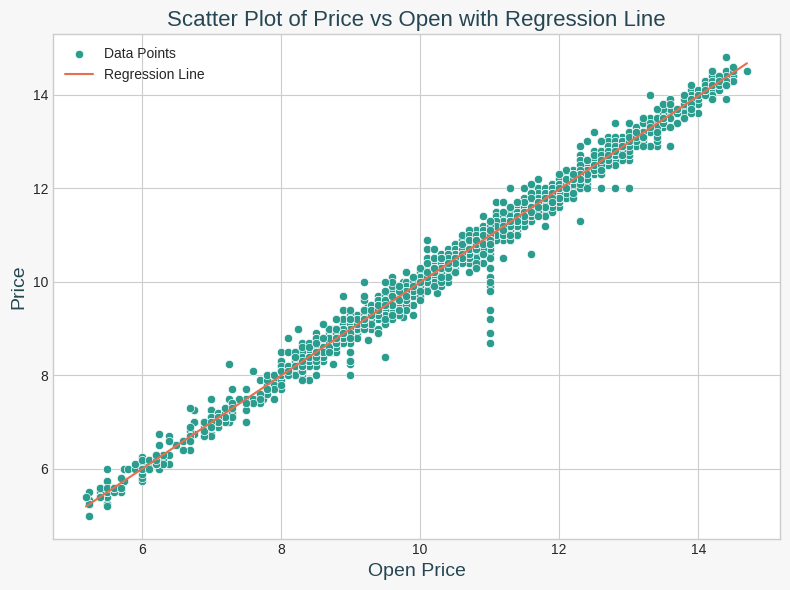

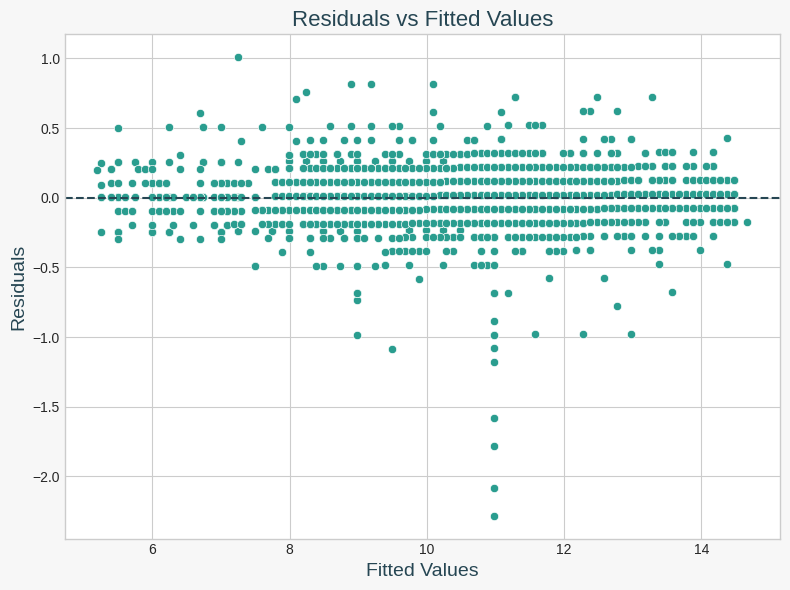

/usr/local/lib/python3.11/dist-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 800x600 with 0 Axes>

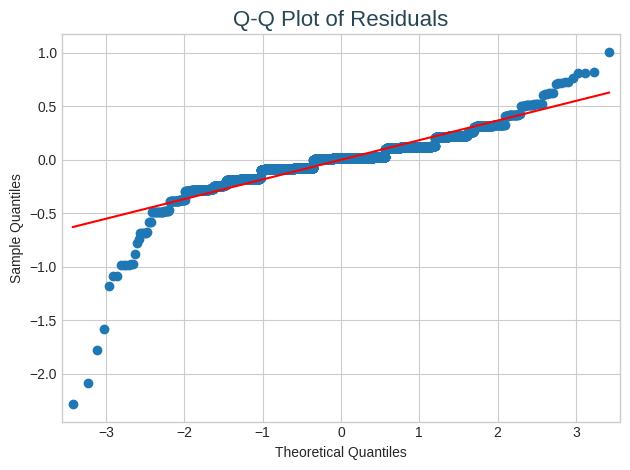

Regression Results Interpretation:
- The regression model estimates the relationship between the Open Price and the closing Price (Price).
- The regression summary shows coefficients for the intercept and Open variable, along with high R-squared indicating that a large proportion of the variation in Price is accounted for by Open.
- The ANOVA table confirms that the model is statistically significant.
- Residual plots are used to check model assumptions: a random scatter in the Residuals vs Fitted plot suggests linearity and homoscedasticity, while the Q-Q plot assesses normality of residuals.
- Limitations may include omitted variables that affect Price, and potential non-linearity in more complex market conditions.

Linear Regression Analysis complete.
Gestalt principle matching: Graph elements use a consistent color palette for analysis and clear distinction.
Analysis complete.


In [33]:
# Linear Regression Analysis using Dialog_2009_2023_Daily.csv dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define the color palette based on Gestalt principles
colors = {'background': '#f7f7f7', 'line': '#2a9d8f', 'highlight': '#e76f51', 'text': '#264653'}


# Display Dataset Description
print('Dataset Description:')
print('Source: Dialog_2009_2023_Daily.csv')
print('Variables: Date, Price, Open, High, Low, Vol., Change %')
print('Size: ' + str(df.shape[0]) + ' rows and ' + str(df.shape[1]) + ' columns')

# Ensure proper conversion of Date column
if not np.issubdtype(df['Date'].dtype, np.datetime64):
    df['Date'] = pd.to_datetime(df['Date'])


# Run regression analysis using the formula API to enable ANOVA
formula = 'Price ~ Open'
model_formula = smf.ols(formula, data=df).fit()

# Regression Summary
print('\
Regression Summary (Formula API):')
print(model_formula.summary())

# Create ANOVA Table
anova_table = sm.stats.anova_lm(model_formula, typ=2)
print('\
ANOVA Table:')
print(anova_table)

# Visualization: Scatter plot with regression line
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8,6), facecolor=colors['background'])
ax = sns.scatterplot(x='Open', y='Price', data=df, color=colors['line'], label='Data Points')
# Regression line
sns.lineplot(x=df['Open'], y=model_formula.predict(df), color=colors['highlight'], label='Regression Line')
plt.title('Scatter Plot of Price vs Open with Regression Line', fontsize=16, color=colors['text'])
plt.xlabel('Open Price', fontsize=14, color=colors['text'])
plt.ylabel('Price', fontsize=14, color=colors['text'])
plt.legend()
plt.tight_layout()
plt.show()

# Residual Analysis: Residual vs Fitted values plot
residuals = model_formula.resid
fitted = model_formula.fittedvalues

plt.figure(figsize=(8,6), facecolor=colors['background'])
sns.scatterplot(x=fitted, y=residuals, color=colors['line'])
plt.axhline(0, color=colors['text'], linestyle='--')
plt.title('Residuals vs Fitted Values', fontsize=16, color=colors['text'])
plt.xlabel('Fitted Values', fontsize=14, color=colors['text'])
plt.ylabel('Residuals', fontsize=14, color=colors['text'])
plt.tight_layout()
plt.show()

# Q-Q plot for normality of residuals
plt.figure(figsize=(8,6), facecolor=colors['background'])
sm.qqplot(residuals, line='s', color=colors['line'])
plt.title('Q-Q Plot of Residuals', fontsize=16, color=colors['text'])
plt.tight_layout()
plt.show()

# Interpretation of Regression Results
print('''\
Regression Results Interpretation:
- The regression model estimates the relationship between the Open Price and the closing Price (Price).
- The regression summary shows coefficients for the intercept and Open variable, along with high R-squared indicating that a large proportion of the variation in Price is accounted for by Open.
- The ANOVA table confirms that the model is statistically significant.
- Residual plots are used to check model assumptions: a random scatter in the Residuals vs Fitted plot suggests linearity and homoscedasticity, while the Q-Q plot assesses normality of residuals.
- Limitations may include omitted variables that affect Price, and potential non-linearity in more complex market conditions.
''')

print('Linear Regression Analysis complete.')

print('Gestalt principle matching: Graph elements use a consistent color palette for analysis and clear distinction.')

print('Analysis complete.')